## Import Dependencies

In [236]:
import pandas as pd
import numpy as np
import csv
import datetime as dt

### Bank and Prime Interest Rates

In [237]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Financial market statistics\10100145.csv"
prime_interest_rate_df = pd.read_csv(data_link)
prime_interest_rate_df.head()

,REF_DATE,GEO,DGUID,Rates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1957-01-02,Canada,2016A000011124,Bank rate,Percent,239,units,0,v80691310,1.2,NaN,..,NaN,NaN,2
1,1957-01-02,Canada,2016A000011124,Chartered bank administered interest rates - P...,Percent,239,units,0,v80691311,1.4,NaN,..,NaN,NaN,2
2,1957-01-02,Canada,2016A000011124,Chartered bank - consumer loan rate,Percent,239,units,0,v80691312,1.5,NaN,..,NaN,NaN,2
3,1957-01-02,Canada,2016A000011124,"Forward premium or discount (-), United States...",Percent,239,units,0,v80691313,1.6,NaN,..,NaN,t,2
4,1957-01-02,Canada,2016A000011124,"Forward premium or discount (-), United States...",Percent,239,units,0,v80691314,1.7,NaN,..,NaN,t,2


In [238]:
bank_rate_df = prime_interest_rate_df[prime_interest_rate_df["Rates"] == "Bank rate"]
bank_rate_df = bank_rate_df[["REF_DATE", "VALUE"]]
bank_rate_df = bank_rate_df.dropna()
bank_rate_df["REF_DATE"] = pd.to_datetime(bank_rate_df["REF_DATE"], infer_datetime_format=True)
bank_rate_df.columns = ["Date", "Bank_Rate"]

In [239]:
bank_rate_df_by_month = bank_rate_df.groupby(pd.Grouper(key="Date", freq="M")).mean()
bank_rate_df_by_month.index = bank_rate_df_by_month.index.strftime('%Y-%m')
bank_rate_df_by_month.head()

,Bank_Rate
Date,
1980-01,14.000
1980-02,14.000
1980-03,14.245
1980-04,16.046
1980-05,13.685


In [240]:
prime_rate_df = prime_interest_rate_df[prime_interest_rate_df["Rates"] == "Chartered bank administered interest rates - Prime rate"]
prime_rate_df = prime_rate_df[["REF_DATE", "VALUE"]]
prime_rate_df = prime_rate_df.dropna()
prime_rate_df["REF_DATE"] = pd.to_datetime(prime_rate_df["REF_DATE"], infer_datetime_format=True)
prime_rate_df.columns = ["Date", "Prime_Rate"]

In [241]:
prime_rate_df_by_month = prime_rate_df.groupby(pd.Grouper(key="Date", freq="M")).mean()
prime_rate_df_by_month.index = prime_rate_df_by_month.index.strftime('%Y-%m')
prime_rate_df_by_month.head()

,Prime_Rate
Date,
1975-01,10.7
1975-02,9.5
1975-03,9.0
1975-04,9.0
1975-05,9.0


### Inflation Rate

In [242]:
def season_to_month(x):
    x = x.split("Q", 2)
    year = x[0]
    quater = x[1]
    if str(quater) == "1":
        date = year + "-01"
        return date
    elif str(quater) == "2":
        date = year + "-04"
        return date  
    elif str(quater) == "3":
        date = year + "-07"
        return date      
    elif str(quater) == "4":
        date = year + "-10"
        return date     

In [243]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Inflation.csv"
inflation_rate_df = pd.read_csv(data_link, skiprows=20,infer_datetime_format=True)
inflation_rate_df.head()

,date,INDINF_CPI_Q,INDINF_CPI_TRIM_Q,INDINF_CPI_MEDIAN_Q,INDINF_CPI_COMMON_Q
0,1993Q1,2.2,2.0,2.0,2.0
1,1993Q2,1.8,1.9,1.9,1.8
2,1993Q3,1.8,1.8,1.7,1.6
3,1993Q4,1.8,1.8,1.7,1.5
4,1994Q1,0.5,1.5,1.6,1.3


In [244]:
inflation_rate_df = inflation_rate_df[["date", "INDINF_CPI_Q"]]
inflation_rate_df["Date"] = inflation_rate_df["date"].apply(lambda x: season_to_month(x))
inflation_rate_df["Date"] = pd.to_datetime(inflation_rate_df["Date"], infer_datetime_format=True)
inflation_rate_df.index = inflation_rate_df["Date"]
inflation_rate_df.drop(columns = ["date","Date"], inplace=True)
inflation_rate_df.index = inflation_rate_df.index.strftime('%Y-%m')
inflation_rate_df.head()

,INDINF_CPI_Q
Date,
1993-01,2.2
1993-04,1.8
1993-07,1.8
1993-10,1.8
1994-01,0.5


### GDP1

In [245]:
def year_to_month(x):
    return x + "-01"

In [246]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\36100434-eng\36100434.csv"
GDP_df = pd.read_csv(data_link)
GDP_df.head()

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,REF_DATE,GEO,DGUID,Seasonal adjustment,Prices,North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,All industries [T001],Dollars,81,millions,6,v65201210,1.1.1.1,1146254.0,NaN,NaN,NaN,0
1,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,Goods-producing industries [T002],Dollars,81,millions,6,v65201211,1.1.1.2,392172.0,NaN,NaN,NaN,0
2,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,Service-producing industries [T003],Dollars,81,millions,6,v65201212,1.1.1.3,753361.0,NaN,NaN,NaN,0
3,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,Business sector industries [T004],Dollars,81,millions,6,v65201213,1.1.1.4,NaN,..,NaN,NaN,0
4,1997-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,"Business sector, goods [T005]",Dollars,81,millions,6,v65201214,1.1.1.5,NaN,..,NaN,NaN,0


In [247]:
GDP_df = GDP_df[["REF_DATE", "VALUE"]]
GDP_df = GDP_df.dropna()
GDP_df["REF_DATE"] = pd.to_datetime(GDP_df["REF_DATE"], infer_datetime_format=True)
GDP_df.columns = ["Date", "GDP"]

In [248]:
GDP_df_by_month = GDP_df.groupby(pd.Grouper(key="Date", freq="M")).mean()
GDP_df_by_month.index = GDP_df_by_month.index.strftime('%Y-%m')
GDP_df = GDP_df_by_month

In [249]:
GDP_df

,GDP
Date,
1997-01,28246.096322
1997-02,28476.520140
1997-03,28457.339755
1997-04,28656.387040
1997-05,28735.432574
...,...
2020-10,44628.008130
2020-11,45052.958188
2020-12,45143.299652


### GDP Growth

In [250]:
def year_to_month(x):
    return x + "-01"

In [251]:
# data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\gdp_population\API_CAN_DS2_en_csv_v2_2255524.csv"
# GDP_df_2 = pd.read_csv(data_link, skiprows=4)
# GDP_df_2.head()

In [252]:
# GDP_df_2 = GDP_df_2[GDP_df_2["Indicator Name"] == "GDP growth (annual %)"]
# GDP_df_2 = GDP_df_2.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])
# GDP_df_2 = GDP_df_2.transpose()
# GDP_df_2["Date"] = GDP_df_2.index
# GDP_df_2["Date"] = GDP_df_2["Date"].apply(lambda x: year_to_month(x))
# GDP_df_2.index = GDP_df_2["Date"]
# GDP_df_2.drop(columns=["Date"], inplace=True)
# GDP_df_2.columns=["GDP_Growth"]
# GDP_df_2.drop("Unnamed: 65-01", axis=0, inplace=True)
# GDP_df_2 = GDP_df_2.dropna()
# GDP_df_2.head()

### Weekly BCPI Metals and Minerals

In [253]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Commodity Price Index.csv"
metal_mineral_price_df = pd.read_csv(data_link, skiprows=20,infer_datetime_format=True)
metal_mineral_price_df.head()

,date,W.BCPI,W.BCNE,W.ENER,W.MTLS,W.FOPR,W.AGRI,W.FISH
0,1972-01-12,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-01-19,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,1972-01-26,100.00,100.00,100.00,100.00,100.00,100.00,100.00
3,1972-02-02,100.16,100.21,99.91,100.29,100.05,100.48,95.56
4,1972-02-09,100.40,100.53,99.78,100.74,100.12,101.20,88.89


In [254]:
metal_mineral_price_df = metal_mineral_price_df[["date", "W.MTLS"]]
metal_mineral_price_df["Date"] = metal_mineral_price_df["date"]
metal_mineral_price_df["Date"] = pd.to_datetime(metal_mineral_price_df["Date"], infer_datetime_format=True)
metal_mineral_price_df.drop(columns = ["date"], inplace=True)

In [255]:
metal_mineral_price_df_by_month = metal_mineral_price_df.groupby(pd.Grouper(key="Date", freq="M")).mean()
metal_mineral_price_df_by_month.index = metal_mineral_price_df_by_month.index.strftime('%Y-%m')
metal_mineral_price_df_by_month.dropna(inplace=True)
metal_mineral_price_df_by_month.head()

,W.MTLS
Date,
1972-01,100.0000
1972-02,100.6275
1972-03,101.2780
1972-04,101.2275
1972-05,101.2480


### NASDAQ

In [256]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\NASDAQ.csv"
NASDAQ_df = pd.read_csv(data_link, infer_datetime_format=True)
NASDAQ_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


In [257]:
NASDAQ_df = NASDAQ_df[["Date", "Open"]]
NASDAQ_df["Date"] = pd.to_datetime(NASDAQ_df["Date"], infer_datetime_format=True)
NASDAQ_df_by_month = NASDAQ_df.groupby(pd.Grouper(key="Date", freq="M")).mean()
NASDAQ_df_by_month.index = NASDAQ_df_by_month.index.strftime('%Y-%m')
NASDAQ_df_by_month.dropna(inplace=True)
NASDAQ_df_by_month.head()

,Open
Date,
1971-02,100.963333
1971-03,104.448260
1971-04,109.555238
1971-05,109.570500
1971-06,108.567728


### USD to CAD

In [258]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\us_dollar\WEBSTATS_XRU_CURRENT_D_DATAFLOW_csv_row.csv"
USD_df = pd.read_csv(data_link, infer_datetime_format=True)
USD_df.head()

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Frequency,D:Daily,D:Daily.1,D:Daily.2,D:Daily.3,D:Daily.4,D:Daily.5,D:Daily.6,D:Daily.7,D:Daily.8,D:Daily.9,D:Daily.10,D:Daily.11,D:Daily.12,D:Daily.13,D:Daily.14,D:Daily.15,D:Daily.16,D:Daily.17,D:Daily.18,D:Daily.19,D:Daily.20,D:Daily.21,D:Daily.22,D:Daily.23,D:Daily.24,D:Daily.25,D:Daily.26,D:Daily.27,D:Daily.28,D:Daily.29,D:Daily.30,D:Daily.31,D:Daily.32,D:Daily.33,D:Daily.34,D:Daily.35,D:Daily.36,D:Daily.37,D:Daily.38,D:Daily.39,D:Daily.40,D:Daily.41,D:Daily.42,D:Daily.43,D:Daily.44,D:Daily.45,D:Daily.46,D:Daily.47,D:Daily.48,D:Daily.49,D:Daily.50,D:Daily.51,D:Daily.52,D:Daily.53,D:Daily.54,D:Daily.55,D:Daily.56,D:Daily.57,D:Daily.58,D:Daily.59,D:Daily.60,D:Daily.61,D:Daily.62,D:Daily.63,D:Daily.64,D:Daily.65,D:Daily.66,D:Daily.67,D:Daily.68,D:Daily.69,D:Daily.70,D:Daily.71,D:Daily.72,D:Daily.73,D:Daily.74,D:Daily.75,D:Daily.76,D:Daily.77,D:Daily.78,D:Daily.79,D:Daily.80
0,Reference area,AE:United Arab Emirates,AL:Albania,AR:Argentina,AT:Austria,AU:Australia,BA:Bosnia and Herzegovina,BE:Belgium,BG:Bulgaria,BH:Bahrain,BN:Brunei,BR:Brazil,CA:Canada,CH:Switzerland,CL:Chile,CN:China,CO:Colombia,CY:Cyprus,CZ:Czech Republic,DE:Germany,DK:Denmark,DZ:Algeria,EE:Estonia,ES:Spain,FI:Finland,FR:France,GB:United Kingdom,GR:Greece,HK:Hong Kong SAR,HR:Croatia,HU:Hungary,ID:Indonesia,IE:Ireland,IL:Israel,IN:India,IR:Iran,IS:Iceland,IT:Italy,JP:Japan,KR:South Korea,KW:Kuwait,KZ:Kazakhstan,LK:Sri Lanka,LT:Lithuania,LU:Luxembourg,LV:Latvia,MK:North Macedonia,MT:Malta,MU:Mauritius,MX:Mexico,MY:Malaysia,NL:Netherlands,NO:Norway,NP:Nepal,NZ:New Zealand,OM:Oman,PE:Peru,PH:Philippines,PK:Pakistan,PL:Poland,PT:Portugal,QA:Qatar,RO:Romania,RS:Serbia,RU:Russia,SA:Saudi Arabia,SE:Sweden,SG:Singapore,SI:Slovenia,SK:Slovakia,TH:Thailand,TN:Tunisia,TR:Turkey,TT:Trinidad and Tobago,TW:Chinese Taipei,UA:Ukraine,US:United States,UY:Uruguay,VE:Venezuela,XM:Euro area,XW:World,ZA:South Africa
1,Currency,AED:UAE Dirham,ALL:Albanian Lek,ARS:Argentine Peso,EUR:Euro,AUD:Australian Dollar,BAM:Bosnian Convertible Mark,EUR:Euro,BGN:Bulgarian Lev,BHD:Bahraini Dinar,BND:Brunei Dollar,BRL:Brazilian Real,CAD:Canadian Dollar,CHF:Swiss Franc,CLP:Chilean Peso,CNY:Yuan Renminbi,COP:Colombian Peso,EUR:Euro,CZK:Czech Koruna,EUR:Euro,DKK:Danish Krone,DZD:Algerian Dinar,EUR:Euro,EUR:Euro,EUR:Euro,EUR:Euro,GBP:Pound Sterling,EUR:Euro,HKD:Hong Kong Dollar,HRK:Croatian Kuna,HUF:Hungarian Forint,IDR:Indonesia Rupiah,EUR:Euro,ILS:New Israeli Sheqel,INR:Indian Rupee,IRR:Iranian Rial,ISK:Iceland Krona,EUR:Euro,JPY:Japanese Yen,KRW:Korean Won,KWD:Kuwaiti Dinar,KZT:Kazakhstan Tenge,LKR:Sri Lanka Rupee,EUR:Euro,EUR:Euro,EUR:Euro,MKD:Macedonian Denar,EUR:Euro,MUR:Mauritius Rupee,MXN:Mexican Peso,MYR:Malaysian Ringgit,EUR:Euro,NOK:Norwegian Krone,NPR:Nepalese Rupee,NZD:New Zealand Dollar,OMR:Rial Omani,PEN:Peru New Sol,PHP:Philippine Piso,PKR:Pakistan Rupee,PLN:Polish zloty,EUR:Euro,QAR:Qatari Rial,RON:Romanian Leu,RSD:Serbian Dinar,RUB:Russian Rouble,SAR:Saudi Riyal,SEK:Swedish Krona,SGD:Singapore Dollar,EUR:Euro,EUR:Euro,THB:Thai Baht,TND:Tunisian Dinar,TRY:Turkish Lira,TTD:Trinidad and Tobago Dollar,TWD:New Taiwan Dollar,UAH:Ukrainian Hryvnia,USD:US Dollar,UYU:Uruguayan Peso,VEF:Bolivar Fuerte,EUR:Euro,XDR:SDR,ZAR:South African Rand
2,Collection,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of o

In [259]:
USD_df = USD_df[["Frequency", "D:Daily.11"]]
USD_df = USD_df.drop(USD_df.index[0:4], axis=0)
USD_df.columns = ["Date", "Exchange Rate"]
USD_df.dropna(inplace=True)
USD_df["Date"] = pd.to_datetime(USD_df["Date"], infer_datetime_format=True)
USD_df["Exchange Rate"] = USD_df["Exchange Rate"].astype("float64")
USD_df["Date"] = pd.to_datetime(USD_df["Date"], infer_datetime_format=True)
USD_df_by_month = USD_df.groupby(pd.Grouper(key="Date", freq="M")).mean()
USD_df_by_month.index = USD_df_by_month.index.strftime('%Y-%m')
USD_df_by_month.head()

,Exchange Rate
Date,
1950-10,1.053333
1950-11,1.040318
1950-12,1.053075
1951-01,1.051873
1951-02,1.049130


### Gold Price

In [260]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\gold.csv"
gold_df = pd.read_csv(data_link, infer_datetime_format=False)
gold_df.head()

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (19,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Market,Perth Mint Spot,Perth Mint Spot.1,Perth Mint Spot.2,Perth Mint Spot.3,Perth Mint Spot.4,Perth Mint Spot.5,Perth Mint Spot.6,Perth Mint Spot.7,Perth Mint Spot.8,Perth Mint Spot.9,Perth Mint Spot.10,Perth Mint Spot.11,Perth Mint Spot.12,Perth Mint Spot.13,Perth Mint Spot.14,Perth Mint Spot.15,Perth Mint Spot.16,Perth Mint Spot.17,Lease Rates,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98
0,Metal/Currency,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,6 Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Priced In,USD,USD,AUD,AUD,JPY,JPY,USD,USD,AUD,AUD,JPY,JPY,USD,USD,AUD,AUD,JPY,JPY,Gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Price Type,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,% pa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Summary,High,High,High,High,High,High,Low,Low,Low,Low,Low,Low,Average,Average,Average,Average,Average,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/01/68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
gold_df = gold_df[["Market", "Perth Mint Spot.12"]]
gold_df.columns = ["Date", "Gold_Price_in_USD"]
gold_df = gold_df.drop(gold_df.index[0:4], axis=0)
gold_df.dropna(inplace=True)
gold_df["Date"] = pd.to_datetime(gold_df["Date"], format="%d/%m/%y")
gold_df["Gold_Price_in_USD"] = gold_df.iloc[:,1].str.replace(',', '').astype(float)
gold_df["Gold_Price_in_USD"] = gold_df["Gold_Price_in_USD"].astype("float64")
gold_df_by_month = gold_df.groupby(pd.Grouper(key="Date", freq="M")).mean()
gold_df_by_month.index = gold_df_by_month.index.strftime('%Y-%m')
gold_df_by_month.head()

,Gold_Price_in_USD
Date,
1991-06,365.887500
1991-07,368.015185
1991-08,356.464074
1991-09,348.186800
1991-10,358.873704


### Gold Price after 2016

In [262]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\gold-Current.csv"
gold_df_current = pd.read_csv(data_link, infer_datetime_format=False)
gold_df_current.head()

,Market,Perth Mint Spot,Perth Mint Spot.1,Perth Mint Spot.2,Perth Mint Spot.3,Perth Mint Spot.4,Perth Mint Spot.5,Perth Mint Spot.6,Perth Mint Spot.7,Perth Mint Spot.8,Perth Mint Spot.9,Perth Mint Spot.10,Perth Mint Spot.11,Perth Mint Spot.12,Perth Mint Spot.13,Perth Mint Spot.14,Perth Mint Spot.15,Perth Mint Spot.16,Perth Mint Spot.17,Lease Rates
0,Metal/Currency,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,Gold,6 Month
1,Priced In,USD,USD,AUD,AUD,JPY,JPY,USD,USD,AUD,AUD,JPY,JPY,USD,USD,AUD,AUD,JPY,JPY,Gold
2,Price Type,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Ask,% pa
3,Summary,High,High,High,High,High,High,Low,Low,Low,Low,Low,Low,Average,Average,Average,Average,Average,Average,NaN
4,01/01/16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
gold_df_current = gold_df_current[["Market", "Perth Mint Spot.12"]]
gold_df_current.columns = ["Date", "Gold_Price_in_USD_after_2016"]
gold_df_current = gold_df_current.drop(gold_df_current.index[0:4], axis=0)
gold_df_current.dropna(inplace=True)
gold_df_current["Date"] = pd.to_datetime(gold_df_current["Date"], format="%d/%m/%y")
gold_df_current["Gold_Price_in_USD_after_2016"] = gold_df_current.iloc[:,1].str.replace(',', '').astype(float)
gold_df_current["Gold_Price_in_USD_after_2016"] = gold_df_current["Gold_Price_in_USD_after_2016"].astype("float64")
gold_df_current_by_month = gold_df_current.groupby(pd.Grouper(key="Date", freq="M")).mean()
gold_df_current_by_month.index = gold_df_current_by_month.index.strftime('%Y-%m')
gold_df_current_by_month.head()

,Gold_Price_in_USD_after_2016
Date,
2016-01,1090.861579
2016-02,1190.085714
2016-03,1240.928500
2016-04,1236.149000
2016-05,1255.700909


### Merge

In [264]:
Merged = USD_df_by_month.join([prime_rate_df_by_month, inflation_rate_df, GDP_df, metal_mineral_price_df_by_month, NASDAQ_df_by_month, gold_df_by_month, gold_df_current_by_month])

In [265]:
Merged.to_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Jesse_Cleaned_Data.csv")

In [266]:
Merged

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Gold_Price_in_USD_after_2016
Date,,,,,,,,
1950-10,1.053333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-11,1.040318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-12,1.053075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01,1.051873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-02,1.049130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01,1.273017,2.45,NaN,45461.591173,676.4900,13195.814196,NaN,1865.722381
2021-02,1.269159,2.45,NaN,45606.793264,678.0100,13733.605726,NaN,1810.338000
2021-03,1.258068,2.45,NaN,NaN,672.1540,13190.961787,NaN,1718.607391


## Data Integration

### Ariel

In [267]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\data_ariel.csv"
Ariel_df = pd.read_csv(data_link)
Ariel_df.head()

,Month,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,Ontario_Out_migrant_Interprovincial,Crime_severity_index_toronto,Toronto_median_age,UT_Graduate_Enrolment,UT_Undergraduate_Enrolment,UT_Total_Enrolment,Ryerson_Undergraduate_Enrolment,Ryerson_Graduate_Enrolment,Ryerson_Total_Enrolment,York_Total_Enrolment,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population
0,1998-01-01,11292059.0,23017.0,3805.0,16785.0,14555.0,91.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-04-01,11322038.0,24818.0,4946.0,21690.0,18455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
Ariel_df["Month"] = pd.to_datetime(Ariel_df["Month"], format="%Y-%m-%d")
Ariel_df.index = Ariel_df["Month"]
Ariel_df_by_month = Ariel_df
Ariel_df_by_month.index = Ariel_df_by_month.index.strftime('%Y-%m')
Ariel_df_by_month.drop(columns=["Month"], inplace=True)

In [269]:
col_list = []
for col in Ariel_df_by_month.columns:
    if " " in col:
        col = col.replace(" ", "")
        col_list.append(col)
    else:
        col_list.append(col)
Ariel_df_by_month.columns = col_list

In [270]:
for index, row in Ariel_df.iterrows():
    for col in Ariel_df.columns:
        Ariel_df.loc[index, col] = str(Ariel_df.loc[index, col]).replace(",", "")
        Ariel_df.loc[index, col] = str(Ariel_df.loc[index, col]).replace(" ", "")

In [271]:
for index, row in Ariel_df.iterrows():
    for col in Ariel_df.columns:
        if "na" in str(row[col]):
            Ariel_df.loc[index,col] = np.nan

In [272]:
Ariel_df_by_month = Ariel_df_by_month.astype('float64')

In [273]:
Ariel_df_by_month.tail()

,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,Ontario_Out_migrant_Interprovincial,Crime_severity_index_toronto,Toronto_median_age,UT_Graduate_Enrolment,UT_Undergraduate_Enrolment,UT_Total_Enrolment,Ryerson_Undergraduate_Enrolment,Ryerson_Graduate_Enrolment,Ryerson_Total_Enrolment,York_Total_Enrolment,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population
Month,,,,,,,,,,,,,,,,,,
2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19184.0,63127.0,82311.0,39000.0,2721.0,41721.0,55600.0,10.4,67.7,60.7,NaN
2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19184.0,63127.0,82311.0,39000.0,2721.0,41721.0,55600.0,10.8,67.0,59.7,NaN
2021-01,14755211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Johnny

In [274]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\data_johnny.csv"
Johnny_df = pd.read_csv(data_link)
Johnny_df.head()

,Date,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
0,2000-01-01,420,168217.0714,0,0
1,2000-02-01,650,180337.6431,0,0
2,2000-03-01,650,180337.6431,0,0
3,2000-04-01,800,181778.4475,0,0
4,2000-05-01,820,183572.3988,0,0


In [275]:
Johnny_df.tail()

,Date,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
251,2020-12-01,1551,625828.1154,2876,1903
252,2021-01-01,1703,624885.6230,4063,1018
253,2021-02-01,2167,676837.4998,2783,3929
254,2021-03-01,2614,707835.1083,4993,5342
255,2021-04-01,2277,727137.3430,3986,2271


In [276]:
Johnny_df["Date"] = pd.to_datetime(Johnny_df["Date"], format="%Y-%m-%d")
Johnny_df.index = Johnny_df["Date"]
Johnny_df_by_month = Johnny_df
Johnny_df_by_month.index = Johnny_df_by_month.index.strftime('%Y-%m')
Johnny_df_by_month.drop(columns=["Date"], inplace=True)

In [277]:
Johnny_df

,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,
2000-01,420,168217.0714,0,0
2000-02,650,180337.6431,0,0
2000-03,650,180337.6431,0,0
2000-04,800,181778.4475,0,0
2000-05,820,183572.3988,0,0
...,...,...,...,...
2020-12,1551,625828.1154,2876,1903
2021-01,1703,624885.6230,4063,1018
2021-02,2167,676837.4998,2783,3929


In [278]:
Johnny_df_by_month

,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,
2000-01,420,168217.0714,0,0
2000-02,650,180337.6431,0,0
2000-03,650,180337.6431,0,0
2000-04,800,181778.4475,0,0
2000-05,820,183572.3988,0,0
...,...,...,...,...
2020-12,1551,625828.1154,2876,1903
2021-01,1703,624885.6230,4063,1018
2021-02,2167,676837.4998,2783,3929


### Shampire

In [279]:
data_link = r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\RD4.csv"
Shampire_df = pd.read_csv(data_link)
Shampire_df.head()

,Month,Prime_Rate,Bank_of_Canada_Overnight_Rate,City_Tax_Rate,Education_Tax_Rate,City_Building_Fund,TotalProperty_Tax_Rate
0,2000-01,6.50,4.86,NaN,NaN,NaN,NaN
1,2000-02,6.75,5.25,NaN,NaN,NaN,NaN
2,2000-03,7.00,5.66,NaN,NaN,NaN,NaN
3,2000-04,7.00,5.66,NaN,NaN,NaN,NaN
4,2000-05,7.50,6.83,NaN,NaN,NaN,NaN


In [280]:
Shampire_df["Date"] = pd.to_datetime(Shampire_df["Month"], format="%Y-%m")
Shampire_df.index = Shampire_df["Date"]
Shampire_df_by_month = Shampire_df
Shampire_df_by_month.index = Shampire_df_by_month.index.strftime('%Y-%m')
Shampire_df_by_month.drop(columns=["Month", "Date"], inplace=True)

In [281]:
for index, row in Shampire_df_by_month.iterrows():
    for col in Shampire_df_by_month.columns:
        Shampire_df_by_month.loc[index, col] = str(Shampire_df_by_month.loc[index, col]).replace(",", "")
        Shampire_df_by_month.loc[index, col] = str(Shampire_df_by_month.loc[index, col]).replace(" ", "")
        Shampire_df_by_month.loc[index, col] = str(Shampire_df_by_month.loc[index, col]).replace("%", "")

In [282]:
Shampire_df_by_month = Shampire_df_by_month.astype('float64')

In [283]:
Shampire_df_by_month

,Prime_Rate,Bank_of_Canada_Overnight_Rate,City_Tax_Rate,Education_Tax_Rate,City_Building_Fund,TotalProperty_Tax_Rate
Date,,,,,,
2000-01,6.50,4.86,NaN,NaN,NaN,NaN
2000-02,6.75,5.25,NaN,NaN,NaN,NaN
2000-03,7.00,5.66,NaN,NaN,NaN,NaN
2000-04,7.00,5.66,NaN,NaN,NaN,NaN
2000-05,7.50,6.83,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-01,2.45,0.25,0.45,0.15,0.01,0.61
2021-02,2.45,0.25,0.45,0.15,0.01,0.61
2021-03,2.45,0.25,0.45,0.15,0.01,0.61


In [284]:
Shampire_df_by_month = Shampire_df_by_month.rename(columns={'Prime_Rate': 'Prime_Rate_2'})

### Merged

In [285]:
Big_Merged = Merged.join([Ariel_df_by_month, Johnny_df, Shampire_df_by_month])

In [286]:
Big_Merged.iloc[783:,6] = Big_Merged.iloc[783:,7]
Big_Merged.drop(columns=["Gold_Price_in_USD_after_2016"], inplace=True)
Big_Merged

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,Ontario_Out_migrant_Interprovincial,Crime_severity_index_toronto,Toronto_median_age,UT_Graduate_Enrolment,UT_Undergraduate_Enrolment,UT_Total_Enrolment,Ryerson_Undergraduate_Enrolment,Ryerson_Graduate_Enrolment,Ryerson_Total_Enrolment,York_Total_Enrolment,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Prime_Rate_2,Bank_of_Canada_Overnight_Rate,City_Tax_Rate,Education_Tax_Rate,City_Building_Fund,TotalProperty_Tax_Rate
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-10,1.053333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-11,1.040318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-12,1.053075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01,1.051873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-02,1.049130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01,1.273017,2.45,NaN,45461.591173,676.4900,13195.814196,1865.722381,14755211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1703.0,624885.6230,4063.0,1018.0,2.45,0.25,0.45,0.15,0.01,0.61
2021-02,1.269159,2.45,NaN,45606.793264,678.0100,13733.605726,1810.338000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2167.0,676837.4998,2783.0,3929.0,2.45,0.25,0.45,0.15,0.01,0.61
2021-03,1.258068,2.45,NaN,NaN,672.1540,13190.961787,1718.607391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2614.0,707835.1083,4993.0,5342.0,2.45,0.25,0.45,0.15,0.01,0.61


In [287]:
check_null = Big_Merged.notnull()

check = pd.DataFrame()
for col in check_null.columns:
    check[col] = ''

for col in check_null.columns:
    col_list = check_null[col].tolist()
    first = col_list.index(True)
    check.loc[0,col] = first

pd.set_option('display.max_columns', None)

check

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,Ontario_Out_migrant_Interprovincial,Crime_severity_index_toronto,Toronto_median_age,UT_Graduate_Enrolment,UT_Undergraduate_Enrolment,UT_Total_Enrolment,Ryerson_Undergraduate_Enrolment,Ryerson_Graduate_Enrolment,Ryerson_Total_Enrolment,York_Total_Enrolment,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Prime_Rate_2,Bank_of_Canada_Overnight_Rate,City_Tax_Rate,Education_Tax_Rate,City_Building_Fund,TotalProperty_Tax_Rate
0,0,291,507,555,255,244,488,567,567,567,567,567,567,603,603,603,603,687,687,687,615,603,603,603,603,591,591,591,591,591,591,807,807,807,807


In [288]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<Figure size 1440x720 with 0 Axes>

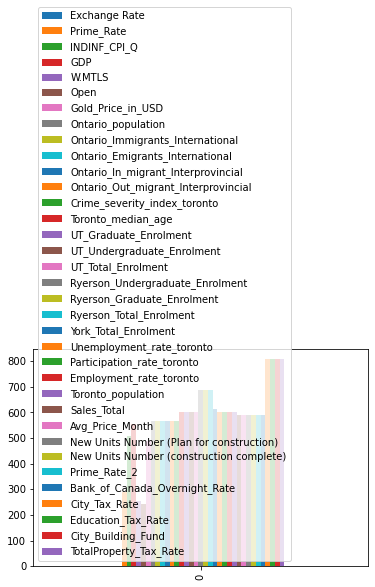

<Figure size 1440x720 with 0 Axes>

In [289]:
fig, ax = plt.subplots()
check.plot(kind="bar", ax=ax)
plt.figure(figsize=(20, 10))
# ax.legend(loc=False)  

In [290]:
check

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,Ontario_Out_migrant_Interprovincial,Crime_severity_index_toronto,Toronto_median_age,UT_Graduate_Enrolment,UT_Undergraduate_Enrolment,UT_Total_Enrolment,Ryerson_Undergraduate_Enrolment,Ryerson_Graduate_Enrolment,Ryerson_Total_Enrolment,York_Total_Enrolment,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Prime_Rate_2,Bank_of_Canada_Overnight_Rate,City_Tax_Rate,Education_Tax_Rate,City_Building_Fund,TotalProperty_Tax_Rate
0,0,291,507,555,255,244,488,567,567,567,567,567,567,603,603,603,603,687,687,687,615,603,603,603,603,591,591,591,591,591,591,807,807,807,807


In [291]:
Big_Merged.iloc[603,:]

Exchange Rate                               1.502559e+00
Prime_Rate                                  7.400000e+00
INDINF_CPI_Q                                2.800000e+00
GDP                                         3.339391e+04
W.MTLS                                      2.621820e+02
Open                                        2.641687e+03
Gold_Price_in_USD                           2.652967e+02
Ontario_population                          1.177194e+07
Ontario_Immigrants_International            3.480100e+04
Ontario_Emigrants_International             3.144000e+03
Ontario_In_migrant_Interprovincial          1.517600e+04
Ontario_Out_migrant_Interprovincial         1.112900e+04
Crime_severity_index_toronto                8.004000e+01
Toronto_median_age                          3.680000e+01
UT_Graduate_Enrolment                       8.549000e+03
UT_Undergraduate_Enrolment                  3.671200e+04
UT_Total_Enrolment                          4.526100e+04
Ryerson_Undergraduate_Enrolment

In [292]:
Big_Merged.drop(columns=["City_Tax_Rate", "Education_Tax_Rate", "City_Building_Fund", "TotalProperty_Tax_Rate", "Ryerson_Undergraduate_Enrolment", "Ryerson_Graduate_Enrolment", "Ryerson_Graduate_Enrolment"], inplace=True)

In [293]:
Big_Merged = Big_Merged.iloc[603:,:]

In [294]:
Big_Merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 2001-01 to 2021-05
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Exchange Rate                             245 non-null    float64
 1   Prime_Rate                                245 non-null    float64
 2   INDINF_CPI_Q                              80 non-null     float64
 3   GDP                                       242 non-null    float64
 4   W.MTLS                                    245 non-null    float64
 5   Open                                      245 non-null    float64
 6   Gold_Price_in_USD                         244 non-null    float64
 7   Ontario_population                        81 non-null     float64
 8   Ontario_Immigrants_International          80 non-null     float64
 9   Ontario_Emigrants_International           80 non-null     float64
 10  Ontario_In_migrant_Interprovincia

In [295]:
Big_Merged.head(50)

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,Ontario_Out_migrant_Interprovincial,Crime_severity_index_toronto,Toronto_median_age,UT_Graduate_Enrolment,UT_Undergraduate_Enrolment,UT_Total_Enrolment,Ryerson_Total_Enrolment,York_Total_Enrolment,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Prime_Rate_2,Bank_of_Canada_Overnight_Rate
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01,1.502559,7.4000,2.8,33393.910683,262.1820,2641.687163,265.296667,11771945.0,34801.0,3144.0,15176.0,11129.0,80.04,36.8,8549.0,36712.0,45261.0,NaN,NaN,5.3,68.6,65.0,4882618.0,528.0,185757.6686,1457.0,511.0,7.25,7.11
2001-02,1.521981,7.2500,NaN,33414.605954,258.2500,2474.819966,261.310800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8549.0,36712.0,45261.0,NaN,NaN,6.4,68.6,64.2,NaN,732.0,189990.7036,946.0,227.0,7.25,7.11
2001-03,1.557832,6.7500,NaN,33421.154116,250.7975,1999.363187,262.573929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8549.0,36712.0,45261.0,NaN,NaN,6.3,69.0,64.7,NaN,925.0,191476.2205,1015.0,387.0,6.75,5.25
2001-04,1.558629,6.6250,3.6,33411.957968,247.6000,1929.581512,260.073810,11827345.0,41662.0,3997.0,20786.0,14852.0,NaN,NaN,8549.0,36712.0,45261.0,NaN,NaN,6.2,69.2,65.0,NaN,836.0,189802.6914,1503.0,1151.0,6.50,4.86
2001-05,1.541287,6.4500,NaN,33549.865149,254.8020,2178.740467,271.755600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8549.0,36712.0,45261.0,NaN,NaN,6.1,69.6,65.4,NaN,958.0,191658.3372,1810.0,175.0,6.25,5.44
2001-06,1.525561,6.2500,NaN,33500.661996,247.9125,2110.664301,270.236923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8549.0,36712.0,45261.0,NaN,NaN,6.3,69.7,65.3,NaN,1024.0,193900.3486,1928.0,411.0,6.25,5.44
2001-07,1.528157,6.1250,2.7,33336.943958,240.2525,2039.163795,267.136923,11897534.0,42152.0,9632.0,22560.0,20916.0,NaN,NaN,8549.0,36712.0,45261.0,NaN,NaN,6.0,70.2,65.9,NaN,832.0,193513.4207,617.0,831.0,6.00,4.50
2001-08,1.538819,5.9500,NaN,33562.427320,234.7120,1937.889988,272.125185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8549.0,36712.0,45261.0,NaN,NaN,6.0,69.8,65.7,NaN,903.0,204706.8538,1779.0,657.0,5.75,4.66
2001-09,1.565071,5.5000,NaN,33387.283713,231.2000,1582.933342,281.717600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8549.0,36712.0,45261.0,NaN,NaN,6.2,69.4,65.1,NaN,733.0,191080.1446,1397.0,1364.0,5.25,3.50


In [296]:
from scipy import interpolate

In [297]:
Big_Merged.index = pd.to_datetime(Big_Merged.index, infer_datetime_format=True)

In [298]:
Big_Merged['INDINF_CPI_Q'] = Big_Merged['INDINF_CPI_Q'].interpolate(method='polynomial', order=2)
Big_Merged['Ryerson_Total_Enrolment'] = Big_Merged['Ryerson_Total_Enrolment'].bfill()
Big_Merged['York_Total_Enrolment'] = Big_Merged['York_Total_Enrolment'].bfill()

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [299]:
Big_Merged['Ryerson_Total_Enrolment'] = Big_Merged['Ryerson_Total_Enrolment'].ffill()
Big_Merged['York_Total_Enrolment'] = Big_Merged['York_Total_Enrolment'].ffill()

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [300]:
Big_Merged['INDINF_CPI_Q'] = Big_Merged['INDINF_CPI_Q'].ffill()

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [301]:
Big_Merged['Ontario_population'] = Big_Merged['Ontario_population'].interpolate(method='polynomial', order=2)
Big_Merged['Ontario_Immigrants_International'] = Big_Merged['Ontario_Immigrants_International'].interpolate(method='polynomial', order=2)
Big_Merged['Ontario_Emigrants_International'] = Big_Merged['Ontario_Emigrants_International'].interpolate(method='polynomial', order=2)
Big_Merged['Ontario_In_migrant_Interprovincial'] = Big_Merged['Ontario_In_migrant_Interprovincial'].interpolate(method='polynomial', order=2)
Big_Merged['Ontario_Out_migrant_Interprovincial'] = Big_Merged['Ontario_Out_migrant_Interprovincial'].interpolate(method='polynomial', order=2)
Big_Merged['Crime_severity_index_toronto'] = Big_Merged['Crime_severity_index_toronto'].interpolate(method='polynomial', order=2)
Big_Merged['Toronto_median_age'] = Big_Merged['Toronto_median_age'].interpolate(method='polynomial', order=2)
Big_Merged['Toronto_population'] = Big_Merged['Toronto_population'].interpolate(method='polynomial', order=2)
# Big_Merged['GDP_Growth'] = Big_Merged['GDP_Growth'].interpolate(method='polynomial', order=2)

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [302]:
Big_Merged['Ontario_population'] = Big_Merged['Ontario_population'].ffill()
Big_Merged['Ontario_Immigrants_International'] = Big_Merged['Ontario_Immigrants_International'].ffill()
Big_Merged['Ontario_Emigrants_International'] = Big_Merged['Ontario_Emigrants_International'].ffill()
Big_Merged['Ontario_In_migrant_Interprovincial'] = Big_Merged['Ontario_In_migrant_Interprovincial'].ffill()
Big_Merged['Ontario_Out_migrant_Interprovincial'] = Big_Merged['Ontario_Out_migrant_Interprovincial'].ffill()
Big_Merged['Crime_severity_index_toronto'] = Big_Merged['Crime_severity_index_toronto'].ffill()
Big_Merged['Toronto_median_age'] = Big_Merged['Toronto_median_age'].ffill()
Big_Merged['Toronto_population'] = Big_Merged['Toronto_population'].ffill()

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [303]:
Big_Merged.tail(50)

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_population,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,Ontario_Out_migrant_Interprovincial,Crime_severity_index_toronto,Toronto_median_age,UT_Graduate_Enrolment,UT_Undergraduate_Enrolment,UT_Total_Enrolment,Ryerson_Total_Enrolment,York_Total_Enrolment,Unemployment_rate_toronto,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete),Prime_Rate_2,Bank_of_Canada_Overnight_Rate
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-01,1.343575,2.7000,1.300000,43740.861789,524.5950,5913.897384,1267.192000,1.400639e+07,27244.000000,4830.000000,24933.000000,21697.000000,50.670025,40.683845,17029.0,61262.0,78291.0,37636.0,53400.0,6.3,66.1,61.9,6.244573e+06,2148.0,578279.6443,2230.0,2299.0,2.70,0.50
2017-05-01,1.360350,2.7000,1.240339,43968.936121,520.9380,6120.867720,1243.781739,1.402414e+07,27466.011282,5443.286881,25070.547825,20892.776549,51.014514,40.676437,17029.0,61262.0,78291.0,37636.0,53400.0,7.0,66.8,62.1,6.254147e+06,2038.0,564807.5358,1513.0,1296.0,2.70,0.50
2017-06-01,1.330603,2.7000,1.302357,44096.000000,521.2075,6229.750910,1259.194545,1.404596e+07,27600.315006,6612.218872,23500.067727,18608.785737,51.395602,40.667721,17029.0,61262.0,78291.0,37636.0,53400.0,6.5,66.0,61.7,6.264298e+06,1702.0,552679.1163,2552.0,1875.0,2.70,0.50
2017-07-01,1.272122,2.8250,1.400000,44051.895470,522.2700,6291.724976,1233.260000,1.407014e+07,28050.000000,7003.000000,21261.000000,16276.000000,51.788703,40.658257,17029.0,61262.0,78291.0,37636.0,53400.0,6.8,66.1,61.6,6.274372e+06,1345.0,532501.9822,2597.0,743.0,2.95,0.75
2017-08-01,1.261092,2.9500,1.525336,44092.502904,546.9440,6310.580864,1279.465652,1.409825e+07,28917.516909,6420.198065,18369.189278,13964.826495,52.193824,40.647989,17029.0,61262.0,78291.0,37636.0,53400.0,5.7,66.0,62.3,6.284942e+06,1476.0,540168.7690,3986.0,2701.0,2.95,0.75
2017-09-01,1.228692,3.1375,1.670128,44262.274100,562.0925,6427.712500,1314.285714,1.412808e+07,30141.840675,5073.748922,15183.640064,11898.388451,52.566677,40.637903,17029.0,61262.0,78291.0,37636.0,53400.0,5.8,66.3,62.4,6.295558e+06,1362.0,554068.9743,2026.0,2627.0,3.20,1.00
2017-10-01,1.259105,3.2000,1.800000,44216.806039,558.7850,6599.952725,1278.313636,1.415078e+07,31385.000000,4322.000000,13392.000000,10900.000000,52.896714,40.628318,17029.0,61262.0,78291.0,37636.0,53400.0,6.1,66.6,62.6,6.305875e+06,1485.0,555004.0182,1556.0,2489.0,3.20,1.00
2017-11-01,1.276007,3.2000,1.918879,44436.445993,561.0780,6790.117141,1279.655909,1.416659e+07,32683.606958,4325.012663,13133.089574,11029.431202,53.205940,40.618595,17029.0,61262.0,78291.0,37636.0,53400.0,6.0,66.7,62.7,6.316581e+06,1606.0,555395.6843,4117.0,1759.0,3.20,1.00
2017-12-01,1.276501,3.2000,2.018315,44552.418118,550.1300,6895.895996,1262.831500,1.417574e+07,33951.806395,4981.125099,14341.991254,12286.098050,53.474402,40.609360,17029.0,61262.0,78291.0,37636.0,53400.0,6.3,67.2,63.0,6.326984e+06,1125.0,532700.2853,1667.0,1941.0,3.20,1.00


In [304]:
Big_Merged.to_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Jesse_Merged_Data_to_05.csv")

In [ ]:
Big_Merged = Big_Merged.iloc[:-5,:]

In [ ]:
Big_Merged

In [ ]:
Big_Merged.to_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Jesse_Merged_Data.csv")

In [ ]:
Big_Merged_Change_Rate = Big_Merged.copy()

In [ ]:
Big_Merged_Change_Rate = Big_Merged_Change_Rate.pct_change()
Big_Merged_Change_Rate

In [ ]:
col_list = []
for col in Big_Merged_Change_Rate.columns:
    col_list.append(f"{col}_Change_Rate")

In [ ]:
Big_Merged_Change_Rate.columns = col_list

In [ ]:
Big_Merged_With_Change_Rate = Big_Merged.join(Big_Merged_Change_Rate)

In [ ]:
Big_Merged_With_Change_Rate

In [ ]:
Big_Merged_With_Change_Rate.to_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Jesse_Merged_With_Change_Rate_Data.csv")